      cd4              time             drugs             age         
 Min.   :  10.0   Min.   :-2.9897   Min.   :0.0000   Min.   :-11.290  
 1st Qu.: 482.8   1st Qu.:-0.3922   1st Qu.:1.0000   1st Qu.: -2.760  
 Median : 701.5   Median : 0.7296   Median :1.0000   Median :  1.510  
 Mean   : 765.1   Mean   : 0.8284   Mean   :0.7559   Mean   :  2.636  
 3rd Qu.: 964.0   3rd Qu.: 2.1923   3rd Qu.:1.0000   3rd Qu.:  6.950  
 Max.   :3184.0   Max.   : 5.4593   Max.   :1.0000   Max.   : 29.080  
     person     
 Min.   :10002  
 1st Qu.:11199  
 Median :30050  
 Mean   :26189  
 3rd Qu.:40362  
 Max.   :41844  

[1] 159497.6

Loading required package: Matrix



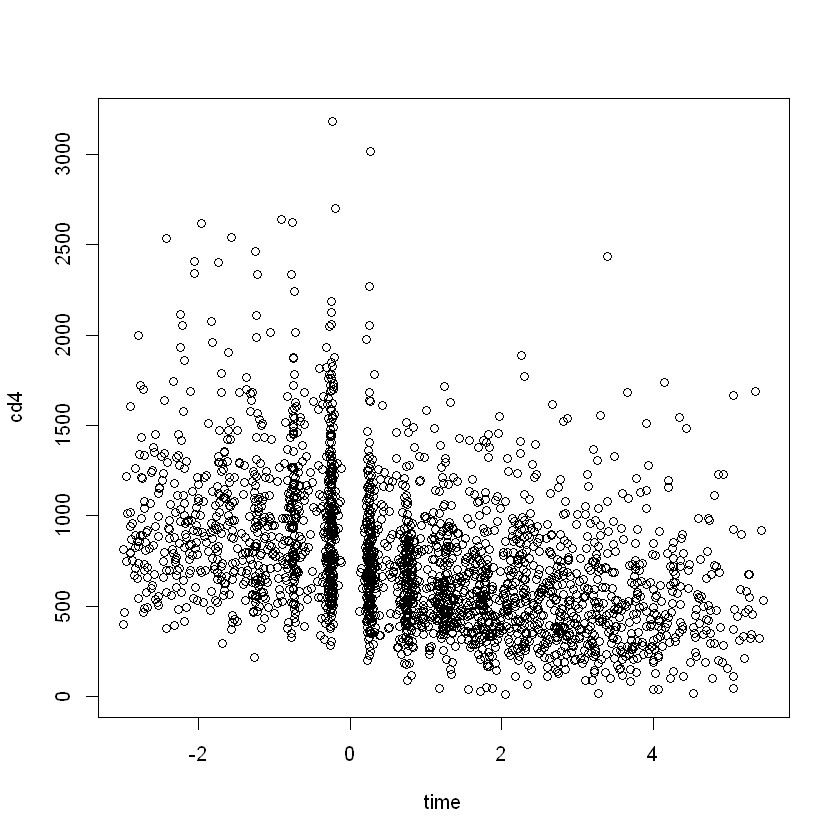

In [1]:
### Generalized Linear Mixed Models

### Assignment 2

#### 1

aids <- read.table("aids.txt", sep="\t", dec=".", header=TRUE)
attach(aids)

plot(time, cd4)
summary(aids)

# cd4              time             drugs             age              person     
# Min.   :  10.0   Min.   :-2.9897   Min.   :0.0000   Min.   :-11.290   Min.   :10002  
# 1st Qu.: 482.8   1st Qu.:-0.3922   1st Qu.:1.0000   1st Qu.: -2.760   1st Qu.:11199  
# Median : 701.5   Median : 0.7296   Median :1.0000   Median :  1.510   Median :30050  
# Mean   : 765.1   Mean   : 0.8284   Mean   :0.7559   Mean   :  2.636   Mean   :26189  
# 3rd Qu.: 964.0   3rd Qu.: 2.1923   3rd Qu.:1.0000   3rd Qu.:  6.950   3rd Qu.:40362  
# Max.   :3184.0   Max.   : 5.4593   Max.   :1.0000   Max.   : 29.080   Max.   :41844 

var(aids[, 1]) # [1] 159497.6

library(lme4)

In [3]:
### a)

model.pois <- glmer(cd4 ~ time*factor(drugs) + age + (1+time|person), family = poisson(link = "log"), data = aids)
summary(model.pois)

pred.data <- data.frame(aids, pred=predict(model.pois, newdata=aids, type="response"))

# plot(pred.data$time, pred.data$pred, type = "n")
# lines(pred.data$time, pred.data$pred)

model.normal <- lmer(cd4 ~ time*factor(drugs) + age + (1+time|person), data = aids)
summary(model.normal)

# model.IG <- glmer(cd4 ~ drugs*time + age + (1+time|person), data = aids, family = inverse.gaussian(link = "log"))
# Error in pwrssUpdate(pp, resp, tol = tolPwrss, GQmat = GHrule(0L), compDev = compDev,  : 
#                        pwrssUpdate did not converge in (maxit) iterations


model.gamma <- glmer(cd4 ~ drugs*time + age + (1+time|person), family = Gamma(link = "log"), data = aids)
summary(model.gamma)

n <- dim(aids)[1]

MSE.poisson <- sum((cd4 - fitted(model.pois, type="response"))^2)/n   # 36230.11
MSE.normal <- sum((cd4 - fitted(model.normal, type="response"))^2)/n  # 43086.29
MSE.gamma <- sum((cd4 - fitted(model.gamma, type="response"))^2)/n    #  47143.12

# another way for calcualting MSE

MSE.poisson <- mean(residuals(model.pois, type="response")^2)
MSE.normal <-  mean(residuals(model.normal, type="response")^2)
MSE.gamma <- mean(residuals(model.gamma, type="response")^2)

# According to MSE calculations, model.pois is the best model

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: cd4 ~ time * factor(drugs) + age + (1 + time | person)
   Data: aids

     AIC      BIC   logLik deviance df.resid 
121735.6 121781.8 -60859.8 121719.6     2368 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-32.204  -3.867  -0.206   3.473  45.008 

Random effects:
 Groups Name        Variance Std.Dev. Corr
 person (Intercept) 0.12365  0.3516       
        time        0.04459  0.2112   0.00
Number of obs: 2376, groups:  person, 369

Fixed effects:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          6.637795   0.019576 339.072  < 2e-16 ***
time                -0.201469   0.011225 -17.948  < 2e-16 ***
factor(drugs)1       0.032368   0.004033   8.026 1.00e-15 ***
age                  0.001321   0.002473   0.534    0.593    
time:factor(drugs)1  0.016300   0.001991   8.187 2.68e-16 ***
---
Signif. codes:  0 '***' 0.0

Linear mixed model fit by REML ['lmerMod']
Formula: cd4 ~ time * factor(drugs) + age + (1 + time | person)
   Data: aids

REML criterion at convergence: 33652.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4742 -0.5114 -0.0691  0.4348  7.4955 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 person   (Intercept) 69719    264.04        
          time         5121     71.56   -0.39
 Residual             54227    232.87        
Number of obs: 2376, groups:  person, 369

Fixed effects:
                     Estimate Std. Error t value
(Intercept)          806.3795    23.0981  34.911
time                -101.9599     8.6453 -11.794
factor(drugs)1        37.8589    20.8737   1.814
age                    0.8007     1.9166   0.418
time:factor(drugs)1   -4.5519     9.2348  -0.493

Correlation of Fixed Effects:
            (Intr) time   fct()1 age   
time        -0.447                     
fctr(drgs)1 -0.730  0.434              
age         -0.248  0.003  0.066 

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Gamma  ( log )
Formula: cd4 ~ drugs * time + age + (1 + time | person)
   Data: aids

     AIC      BIC   logLik deviance df.resid 
 32606.2  32658.1 -16294.1  32588.2     2367 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1326 -0.5249 -0.0210  0.5273  4.8764 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 person   (Intercept) 0.05441  0.2333        
          time        0.01494  0.1222   -0.05
 Residual             0.09520  0.3085        
Number of obs: 2376, groups:  person, 369

Fixed effects:
             Estimate Std. Error t value Pr(>|z|)    
(Intercept)  6.585448   0.033028 199.388   <2e-16 ***
drugs        0.067128   0.027059   2.481   0.0131 *  
time        -0.218428   0.016713 -13.070   <2e-16 ***
age          0.002361   0.003142   0.751   0.4524    
drugs:time   0.025377   0.013463   1.885   0.0594 .  
---
Signif. codes:  0 '***' 0.001 

In [4]:
### b)

# For the max. likelihood estimate, we consider only the fixed effects
newdata <- data.frame(time=2.02, drugs=1, age=13.72)
mu.hat <- predict(model.pois, newdata=newdata, type="response", re.form=NA)
mu.hat

# 552.3824

1 
552.3828

In [5]:
### c)


### Parametric bootstrap method


n<-dim(aids)[1]
newdata <- data.frame(time=2.02, drugs=1, age=13.72, person=10396)
mupred.new <- predict(model.pois, newdata=newdata, type="response") # 847.5674 


mupred<-predict(model.pois, newdata=aids, type="response")
yf.star<-numeric()

for(b in 1:50){
  
  yb <- rpois(n, lambda=mupred) # artificial cd4
  model.b <- glmer(yb ~ drugs*time + age + (1+time|person), data=aids, family=poisson(link="log"))
  mupred.star <-predict(model.b, newdata=newdata, type="response")
  yf.star[b] <- rpois(1, lambda=mupred.star)
  
}

lower.bound<-quantile(yf.star, 0.1)
upper.bound<-quantile(yf.star, 0.9)
lower.bound
upper.bound

# > lower.bound
# 10% 
# 810.9 
# > upper.bound
# 90% 
# 883.5 

### Estimated quantiles method - easiest method

newdata <- data.frame(time=2.02, drugs=1, age=13.72, person=10396)
mupred.new <- predict(model.pois, newdata=newdata, type="response") # 847.5674

lower <-qpois(0.1, lambda = mupred.new)
upper <-qpois(0.9, lambda = mupred.new)
lower
upper

# > lower
# [1] 810
# > upper
# [1] 885

10% 
820.1

90% 
881.1

[1] 810

[1] 885

In [6]:
# 2

locust <- read.table("locust.txt", sep="\t", dec=".", header=TRUE)
attach(locust)

summary(locust)

# id             move             sex           time               feed    
# Min.   : 1.00   Min.   :0.0000   Min.   :0.0   Min.   :0.008333   Min.   :0.0  
# 1st Qu.: 6.75   1st Qu.:0.0000   1st Qu.:0.0   1st Qu.:0.341667   1st Qu.:0.0  
# Median :12.50   Median :0.0000   Median :0.5   Median :0.675000   Median :0.5  
# Mean   :12.50   Mean   :0.2891   Mean   :0.5   Mean   :0.675000   Mean   :0.5  
# 3rd Qu.:18.25   3rd Qu.:1.0000   3rd Qu.:1.0   3rd Qu.:1.008333   3rd Qu.:1.0  
# Max.   :24.00   Max.   :1.0000   Max.   :1.0   Max.   :1.341667   Max.   :1.0 


model.binomial <- glmer(move ~ time + factor(sex) + factor(feed) + (1+time|id), data=locust, family=binomial(link="logit"))
summary(model.binomial)

The following object is masked from aids:

    time




       id             move             sex           time         
 Min.   : 1.00   Min.   :0.0000   Min.   :0.0   Min.   :0.008333  
 1st Qu.: 6.75   1st Qu.:0.0000   1st Qu.:0.0   1st Qu.:0.341667  
 Median :12.50   Median :0.0000   Median :0.5   Median :0.675000  
 Mean   :12.50   Mean   :0.2891   Mean   :0.5   Mean   :0.675000  
 3rd Qu.:18.25   3rd Qu.:1.0000   3rd Qu.:1.0   3rd Qu.:1.008333  
 Max.   :24.00   Max.   :1.0000   Max.   :1.0   Max.   :1.341667  
      feed    
 Min.   :0.0  
 1st Qu.:0.0  
 Median :0.5  
 Mean   :0.5  
 3rd Qu.:1.0  
 Max.   :1.0  

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: move ~ time + factor(sex) + factor(feed) + (1 + time | id)
   Data: locust

     AIC      BIC   logLik deviance df.resid 
  3123.8   3167.6  -1554.9   3109.8     3857 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9400 -0.4607 -0.1499  0.4762 11.1925 

Random effects:
 Groups Name        Variance Std.Dev. Corr 
 id     (Intercept) 1.299    1.140         
        time        2.385    1.544    -0.64
Number of obs: 3864, groups:  id, 24

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.2385     0.3730  -3.320 0.000899 ***
time            1.7032     0.3620   4.704 2.55e-06 ***
factor(sex)1    0.3465     0.3961   0.875 0.381645    
factor(feed)1  -3.5057     0.4091  -8.569  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) time

In [8]:
### a)

fixef(model.binomial)[2] # 1.703167

### b)

newdata <- data.frame(id=24, sex=0, time=1.35, feed=0)
mupred <- predict(model.binomial, newdata=newdata, type="response") # 0.789132
mupred

time 
1.703167

1 
0.789132

In [9]:
### c)

model.H0 <- glmer(move ~ time + factor(sex) + (1+time|id), data=locust, family=binomial(link="logit"))
summary(model.H0)

model.H1 <- model.binomial
summary(model.H1)

anova(model.H0, model.H1)
# value of the test statistic = 34.261
# p-value = 4.819e-09. X2 = feed is statistically significant in the model.

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: move ~ time + factor(sex) + (1 + time | id)
   Data: locust

     AIC      BIC   logLik deviance df.resid 
  3156.1   3193.6  -1572.0   3144.1     3858 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8405 -0.4582 -0.1565  0.4764 11.7216 

Random effects:
 Groups Name        Variance Std.Dev. Corr 
 id     (Intercept) 6.021    2.454         
        time        2.436    1.561    -0.59
Number of obs: 3864, groups:  id, 24

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -3.0746     0.6726  -4.571 4.85e-06 ***
time           1.8524     0.3777   4.904 9.38e-07 ***
factor(sex)1   0.2107     0.8257   0.255    0.799    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) time  
time        -0.494       
factor(sx)1 -0.602 -0.027

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: move ~ time + factor(sex) + factor(feed) + (1 + time | id)
   Data: locust

     AIC      BIC   logLik deviance df.resid 
  3123.8   3167.6  -1554.9   3109.8     3857 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9400 -0.4607 -0.1499  0.4762 11.1925 

Random effects:
 Groups Name        Variance Std.Dev. Corr 
 id     (Intercept) 1.299    1.140         
        time        2.385    1.544    -0.64
Number of obs: 3864, groups:  id, 24

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.2385     0.3730  -3.320 0.000899 ***
time            1.7032     0.3620   4.704 2.55e-06 ***
factor(sex)1    0.3465     0.3961   0.875 0.381645    
factor(feed)1  -3.5057     0.4091  -8.569  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) time

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model.H0,6,3156.072,3193.629,-1572.036,3144.072,NA,NA,NA
model.H1,7,3123.811,3167.627,-1554.905,3109.811,34.26135,1,4.81858e-09


In [10]:
### d)

ST <- getME(model.binomial, "ST")$id
S <- diag(diag(ST))
T <- ST-S+diag(2)
F <- T%*%S%*%S%*%t(T)
cov.bi <-F
cov.bi

#       [,1]      [,2]
# [1,]  1.298871 -1.127351
# [2,] -1.127351  2.385353

-1.127351/sqrt(1.298871*2.385353) # the correlation for the random coefficients
# [1] -0.6404715

1.298871,-1.127351
-1.127351,2.385353


[1] -0.6404715

In [11]:
### e)

n<-dim(locust)[1]
newdata <- data.frame(sex=0, time=1.35, feed=0)
muhat.new <- predict(model.binomial, newdata=newdata, type="response", re.form=NA) # 0.7428477
YS.pred <- 100*muhat.new # 74.28477

mupred <- predict(model.binomial, newdata=locust, type="response")

e.b<-numeric()

for(b in 1:50){
  
  yb<-numeric()
  
  for(i in 1:n){
    
    yb[i] <- sample(0:1, 1, prob=c(1-mupred[i], mupred[i]))
    
  }
  
  model.b <- glmer(move ~ time + factor(sex) + factor(feed) + (1+time|id), data=locust, family=binomial(link="logit"))
  muhat.star <- predict(model.b, newdata=newdata, type="response", re.form=NA)
  YS.predB <- 100*muhat.star
  
  yf.b <- sample(0:1, 100, prob=c(1-muhat.star,muhat.star), replace=TRUE)
  
  e.b[b] <- sum(yf.b)-YS.predB
  
}

var.error <- var(e.b)
var.error

z<-qnorm(c(0.1), lower.tail=FALSE)
lower.bound <- YS.pred -z * sqrt(var.error)
upper.bound <- YS.pred +z * sqrt(var.error)
lower.bound
upper.bound

# > lower.bound
# 1 
# 69.00645 
# > upper.bound
# 1 
# 79.5631 
# >

[1] 17.11878

1 
68.98237

1 
79.58717